In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False
pd.get_option("display.max_columns")

20

In [2]:
dataframe = pd.read_csv('insurance.csv')
df = dataframe.copy()

In [3]:
print("Total Features : ",df.shape[1])
print("Total Data     : ",df.shape[0])

Total Features :  7
Total Data     :  1338


In [4]:
print("Featues : ",df.columns.tolist())

Featues :  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


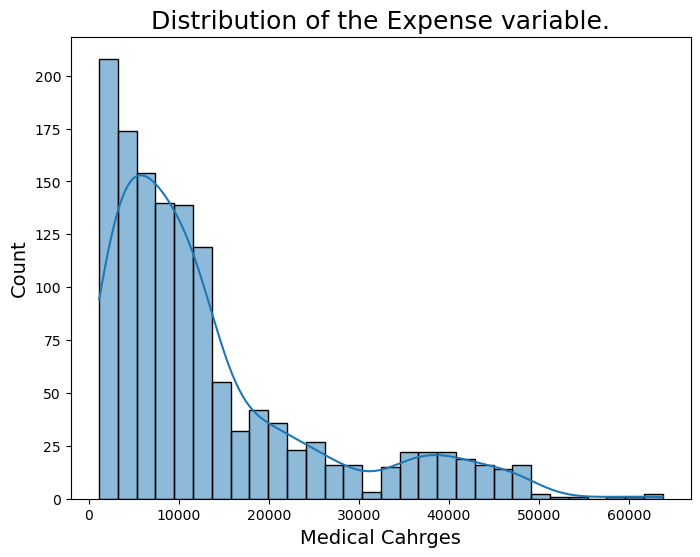

In [6]:
axis=sns.histplot(x='charges',kde=True,data=df)
axis.set_title('Distribution of the Expense variable.', size=18)
axis.set_xlabel('Medical Cahrges', size=14)
axis.set_ylabel('Count', size=14)
plt.show()

In [7]:
cat_feat = [feature for feature in df.columns if df[feature].dtype=='O']
print("Categorical Features : ",cat_feat)

Categorical Features :  ['sex', 'smoker', 'region']


In [8]:
for feature in cat_feat:
    print("Unique variables : ",df[feature].unique())

Unique variables :  ['female' 'male']
Unique variables :  ['yes' 'no']
Unique variables :  ['southwest' 'southeast' 'northwest' 'northeast']


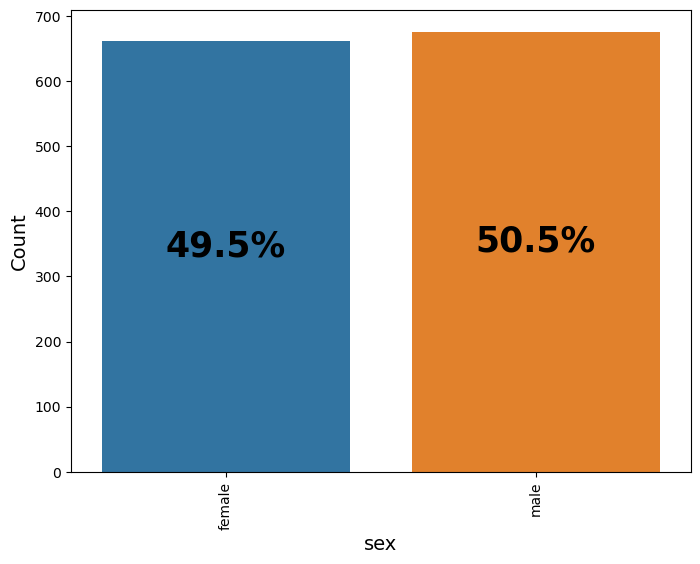

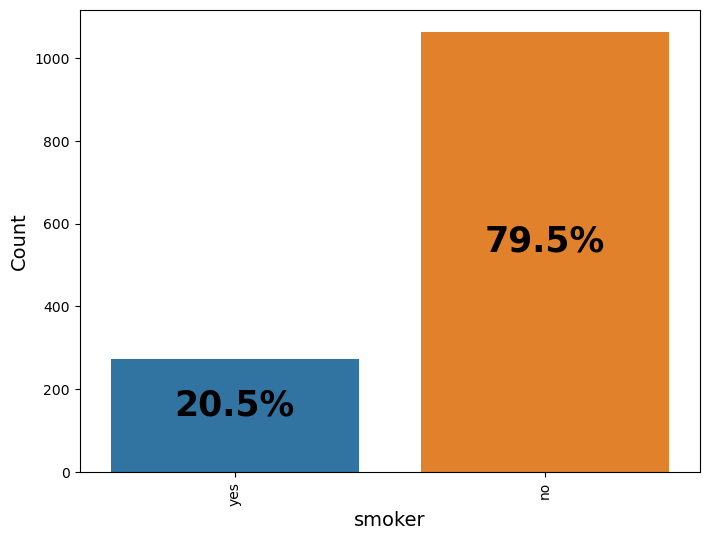

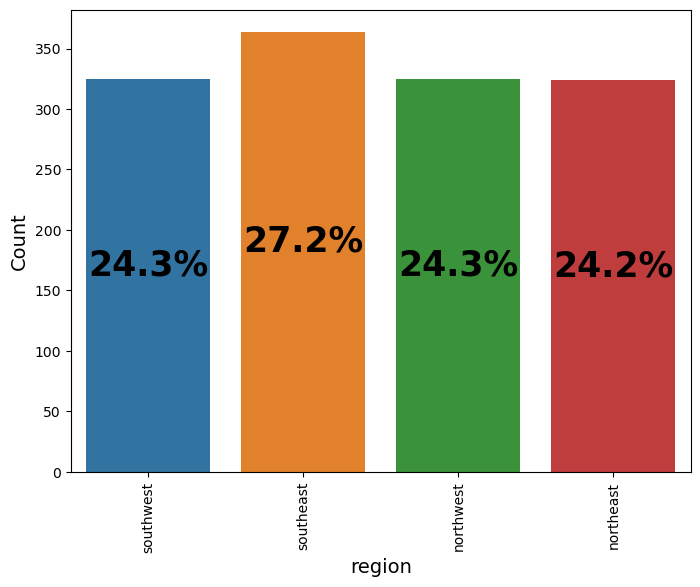

In [9]:
for feature in cat_feat:
    axis=sns.countplot(x=feature,palette='tab10',data=df)
    for patch in axis.patches:
        axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2,
             s = f"{np.round(patch.get_height()/len(df)*100, 1)}%",
             ha = 'center', size = 25, rotation = 0, weight = 'bold',
             color = 'black')
    plt.xlabel(feature, size=14)
    plt.ylabel('Count', size=14)
    plt.xticks(rotation=90)
    plt.show()

In [10]:
num_feat = [feature for feature in df.columns if df[feature].dtype!='O']
print("Numerical Features : ",num_feat)

Numerical Features :  ['age', 'bmi', 'children', 'charges']


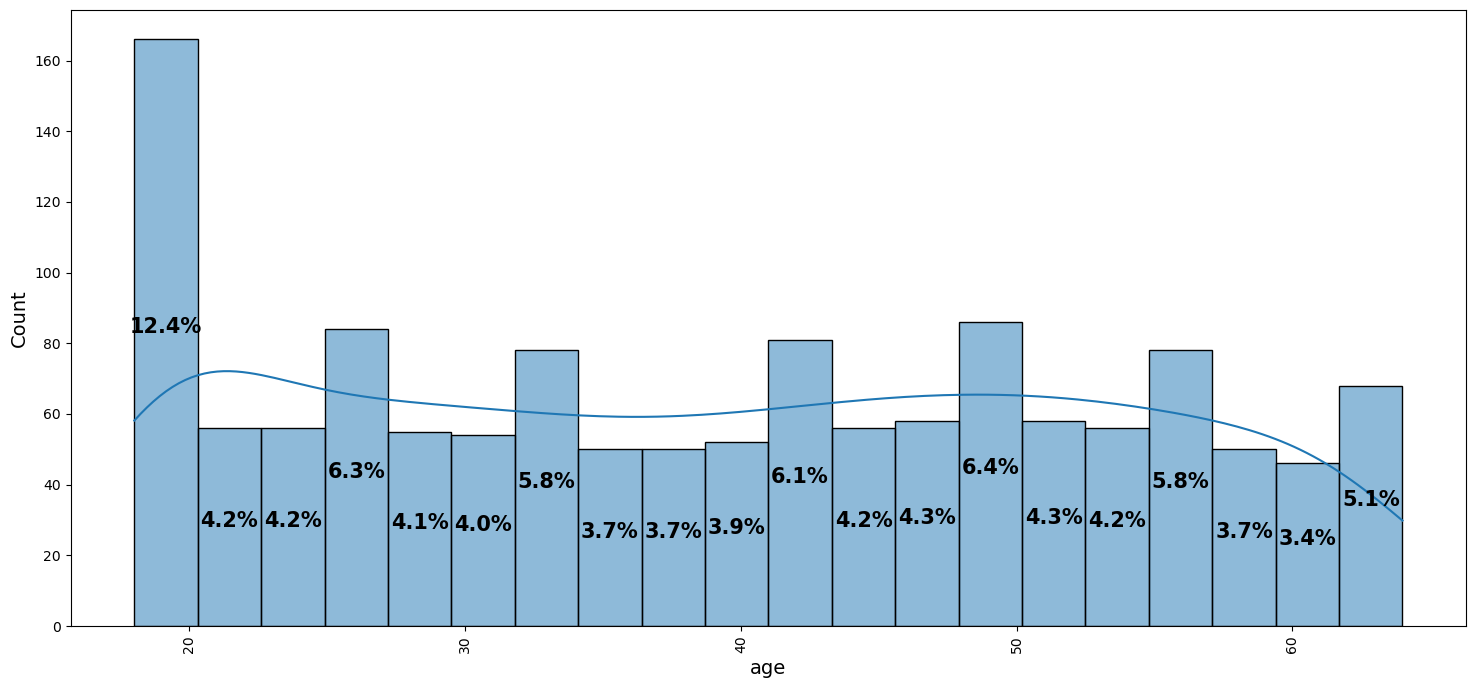

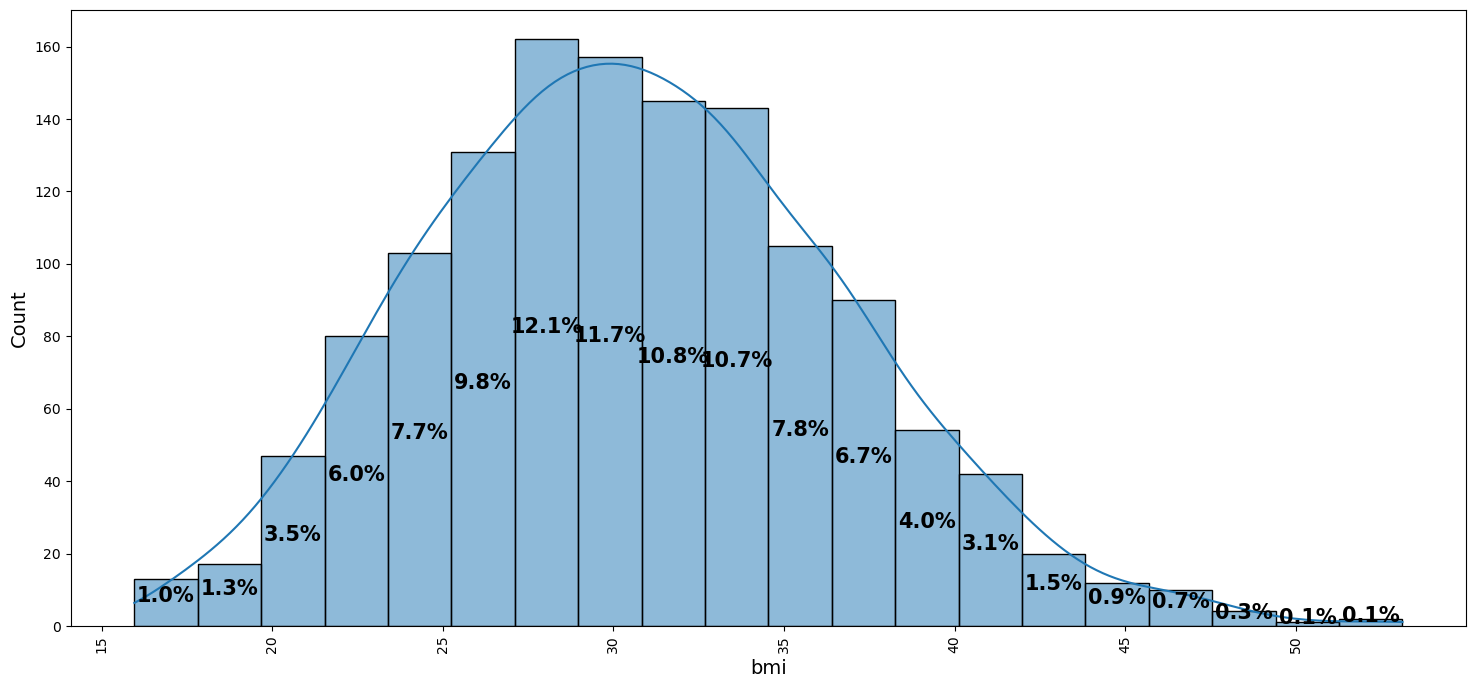

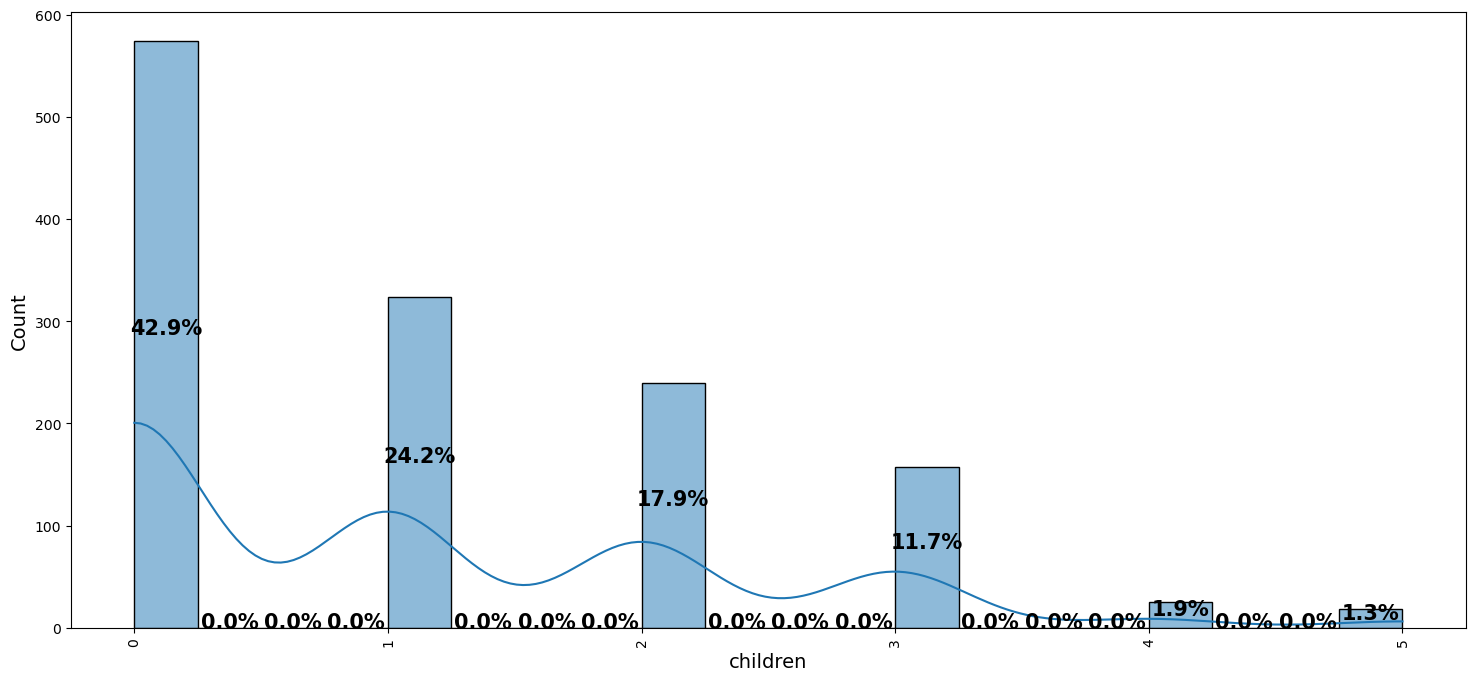

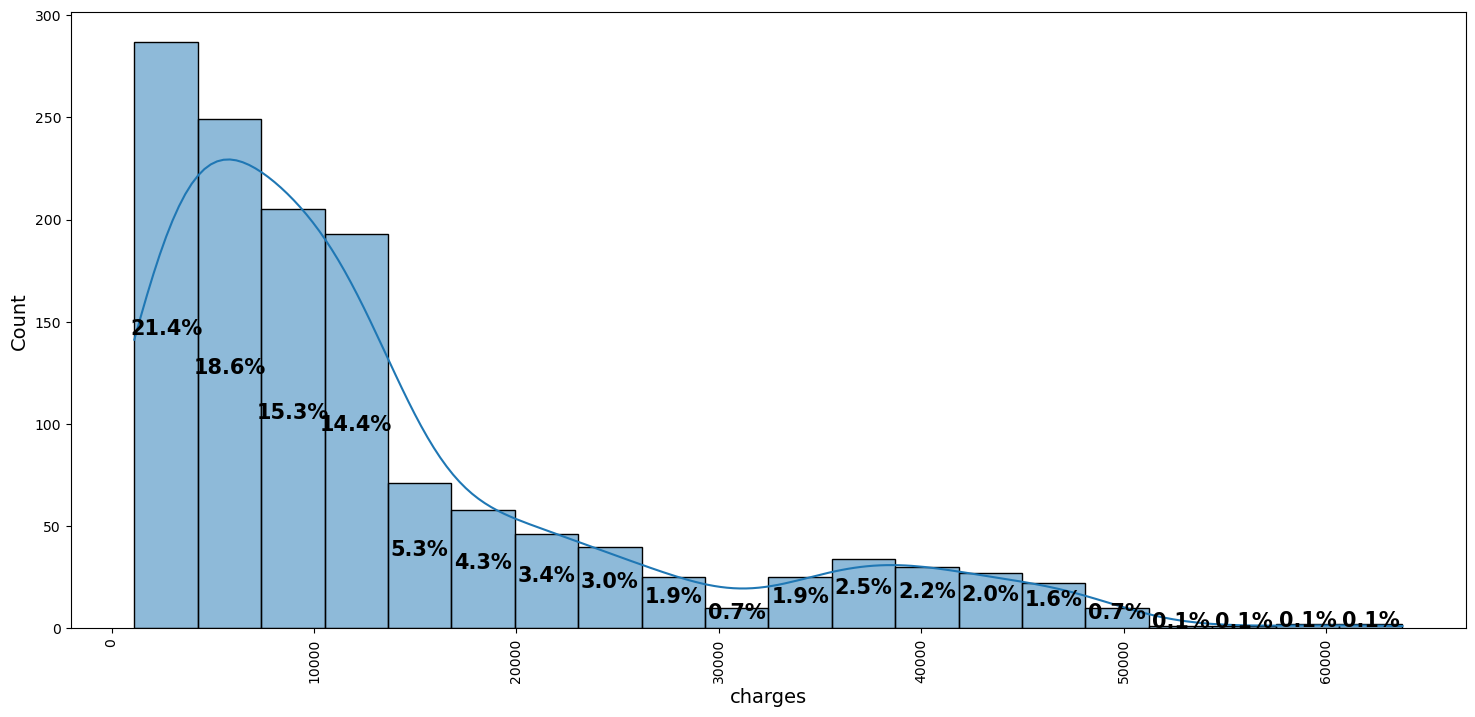

In [11]:
for feature in num_feat:
    plt.figure(figsize=(18,8))
    axis=sns.histplot(x=feature,palette='rocket',kde=True,bins=20,data=df)
    for patch in axis.patches:
        axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2,
             s = f"{np.round(patch.get_height()/len(df)*100, 1)}%",
             ha = 'center', size = 15, rotation = 0, weight = 'bold',
             color = 'black')
    plt.xlabel(feature, size=14)
    plt.ylabel('Count', size=14)
    plt.xticks(rotation=90)
    plt.show()

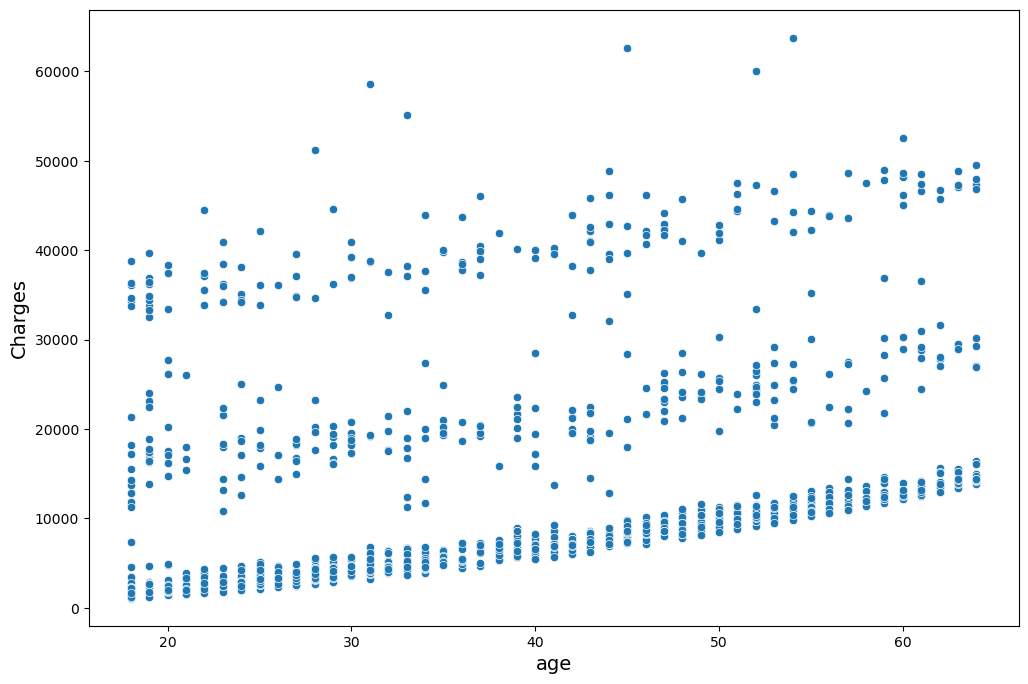

In [12]:
plt.figure(figsize=(12,8))
axis=sns.scatterplot(x='age', y='charges',data=df)
axis.set_xlabel('age', size=14)
axis.set_ylabel('Charges', size=14)
plt.show()

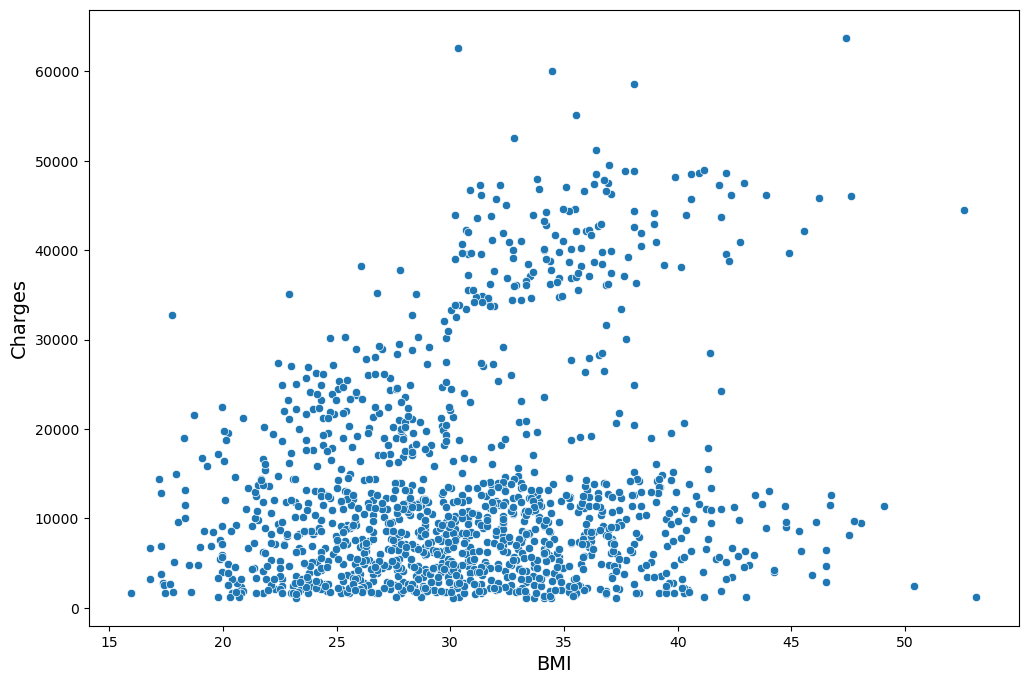

In [13]:
plt.figure(figsize=(12,8))
axis=sns.scatterplot(x='bmi', y='charges',data=df)
axis.set_xlabel('BMI', size=14)
axis.set_ylabel('Charges', size=14)
plt.show()

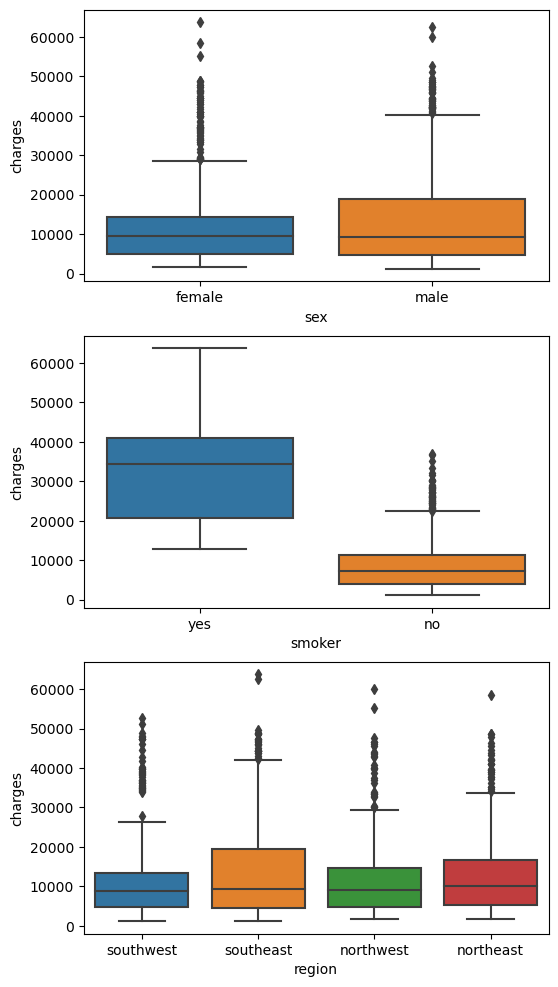

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(6, 12))
for var, subplot in zip(cat_feat, ax.flatten()):
    sns.boxplot(x=var, y='charges', data=df, ax=subplot)

In [15]:
df['sex'] = df['sex'].replace('female',0)
df['sex'] = df['sex'].replace('male',1)

In [16]:
df['smoker'] = df['smoker'].replace('no',0)
df['smoker'] = df['smoker'].replace('yes',1)

In [17]:
region = pd.get_dummies(df['region'])
region

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [18]:
df = pd.concat([df,region],axis=1)

In [19]:
drop_columns = ['region']

In [20]:
df.drop(drop_columns,axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


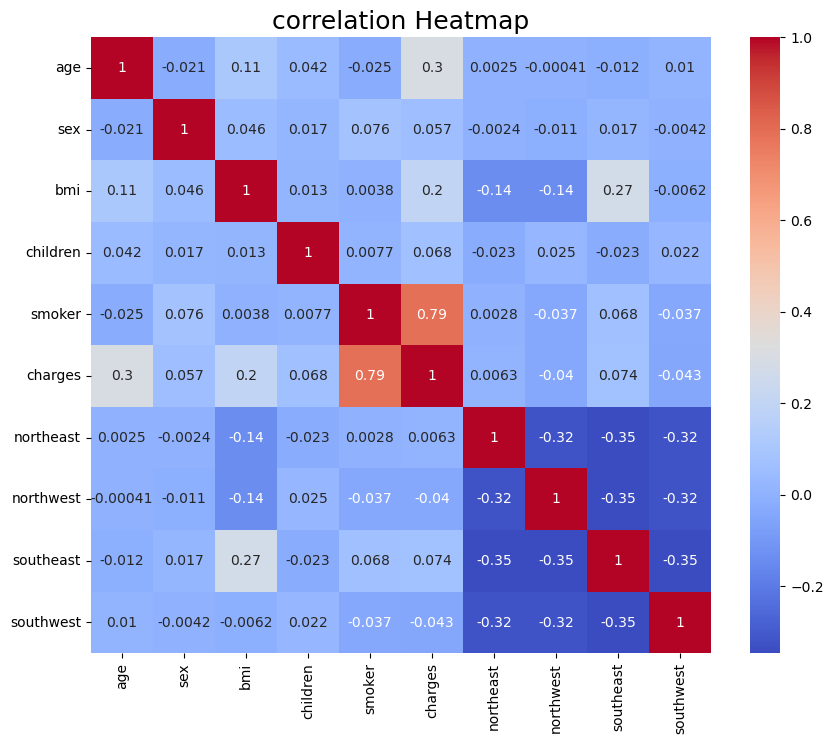

In [21]:
plt.figure(figsize=(10,8))
axis = sns.heatmap(df.corr(),cmap='coolwarm',cbar=True,annot=True)
axis.set_title('correlation Heatmap', size=18)
plt.show()

In [22]:
X = df.drop('charges',axis=1)
y = df['charges']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [25]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
selector = SelectFromModel(Lasso(alpha=0.05,random_state=101))
selector.fit(X_train,y_train)
SelectFromModel(estimator=Lasso(alpha=0.05, random_state=101))
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

### Linear Regression

In [27]:
lr_regressor = LinearRegression()
lr_regressor.fit(X_train,y_train)
lr_y = lr_regressor.predict(X_test)

C:\Users\clivinjohn.geju\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

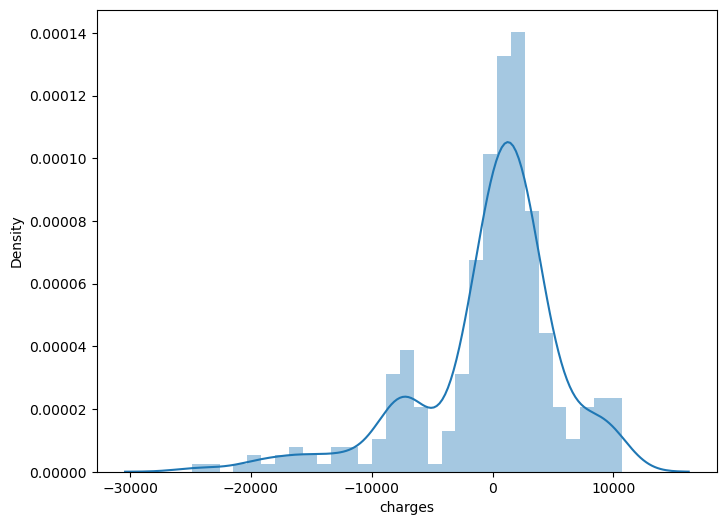

In [28]:
sns.distplot(lr_y-y_test)

In [29]:
print('Coefficient o R^2 <-- on train data : {}'.format(lr_regressor.score(X_train,y_train)))
print('Coefficient o R^2 <-- on test data : {}'.format(lr_regressor.score(X_test,y_test)))
print("Mean absolute Error : ",mean_absolute_error(lr_y,y_test))
print("Mean squared Error : ",mean_squared_error(lr_y,y_test))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(lr_y,y_test)))

Coefficient o R^2 <-- on train data : 0.7479857097239051
Coefficient o R^2 <-- on test data : 0.7560067488048683
Mean absolute Error :  4067.367637190252
Mean squared Error :  34716000.94493754
Root Mean Squared Error :  5892.028593357091


### SVR (Support Vector Regression)

In [30]:
svr_regressor = SVR()
svr_regressor.fit(X_train,y_train)
svr_y = svr_regressor.predict(X_test)

C:\Users\clivinjohn.geju\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

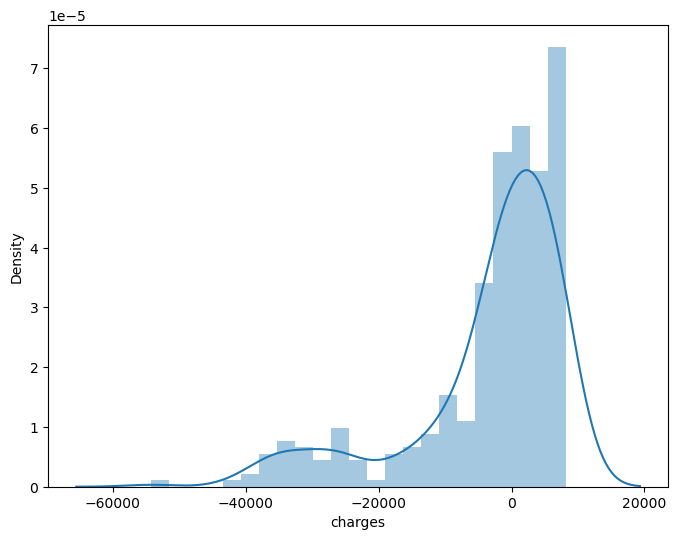

In [31]:
sns.distplot(svr_y-y_test)

In [32]:
print('Coefficient o R^2 <-- on train data : {}'.format(svr_regressor.score(X_train,y_train)))
print('Coefficient o R^2 <-- on test data : {}'.format(svr_regressor.score(X_test,y_test)))
print("Mean absolute Error : ",mean_absolute_error(svr_y,y_test))
print("Mean squared Error : ",mean_squared_error(svr_y,y_test))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(svr_y,y_test)))

Coefficient o R^2 <-- on train data : -0.10610603171903121
Coefficient o R^2 <-- on test data : -0.08287004288230304
Mean absolute Error :  7896.166816652952
Mean squared Error :  154073595.26465738
Root Mean Squared Error :  12412.638529525355


### K Nearest Neighbour

In [33]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train,y_train)
knn_y = knn_regressor.predict(X_test)

C:\Users\clivinjohn.geju\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

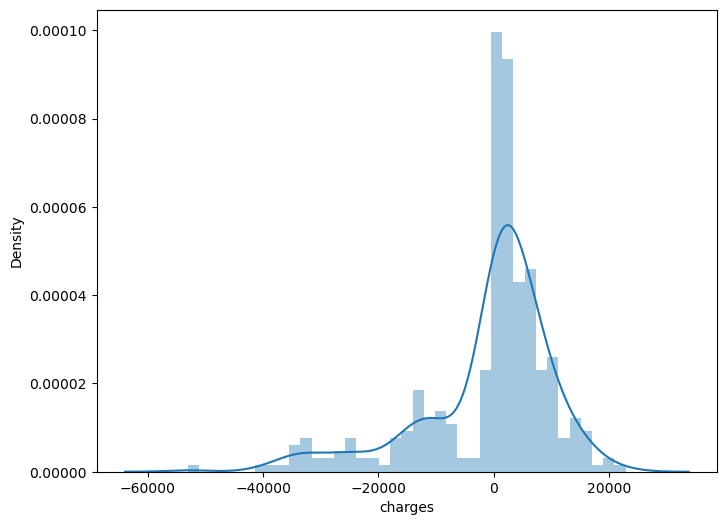

In [34]:
sns.distplot(knn_y-y_test)

In [35]:
print('Coefficient o R^2 <-- on train data : {}'.format(knn_regressor.score(X_train,y_train)))
print('Coefficient o R^2 <-- on test data : {}'.format(knn_regressor.score(X_test,y_test)))
print("Mean absolute Error : ",mean_absolute_error(knn_y,y_test))
print("Mean squared Error : ",mean_squared_error(knn_y,y_test))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(knn_y,y_test)))

Coefficient o R^2 <-- on train data : 0.462893751129997
Coefficient o R^2 <-- on test data : 0.03925731296684354
Mean absolute Error :  7839.799176660895
Mean squared Error :  136696994.148461
Root Mean Squared Error :  11691.74897731135


### Decision Tree

In [36]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train,y_train)
dt_y = dt_regressor.predict(X_test)

C:\Users\clivinjohn.geju\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

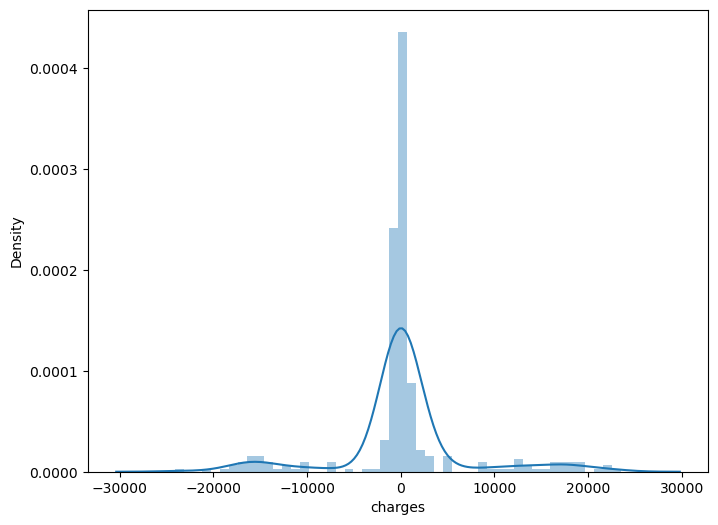

In [37]:
sns.distplot(dt_y-y_test)

In [38]:
print('Coefficient o R^2 <-- on train data : {}'.format(dt_regressor.score(X_train,y_train)))
print('Coefficient o R^2 <-- on test data : {}'.format(dt_regressor.score(X_test,y_test)))
print("Mean absolute Error : ",mean_absolute_error(dt_y,y_test))
print("Mean squared Error : ",mean_squared_error(dt_y,y_test))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(dt_y,y_test)))

Coefficient o R^2 <-- on train data : 1.0
Coefficient o R^2 <-- on test data : 0.6835920858665769
Mean absolute Error :  3285.911283695522
Mean squared Error :  45019349.47887937
Root Mean Squared Error :  6709.646002501128


### Random Forest

In [39]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)
rf_y = rf_regressor.predict(X_test)

C:\Users\clivinjohn.geju\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

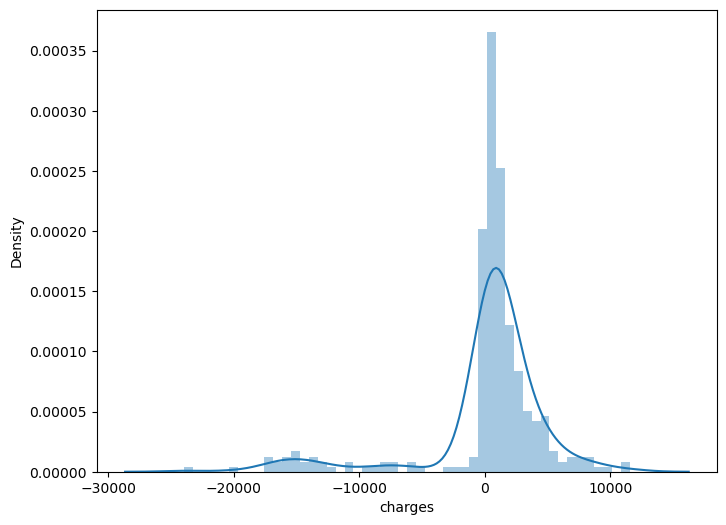

In [40]:
sns.distplot(rf_y-y_test)

In [41]:
print('Coefficient o R^2 <-- on train data : {}'.format(rf_regressor.score(X_train,y_train)))
print('Coefficient o R^2 <-- on test data : {}'.format(rf_regressor.score(X_test,y_test)))
print("Mean absolute Error : ",mean_absolute_error(rf_y,y_test))
print("Mean squared Error : ",mean_squared_error(rf_y,y_test))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(rf_y,y_test)))

Coefficient o R^2 <-- on train data : 0.9782366692094893
Coefficient o R^2 <-- on test data : 0.8229164783936445
Mean absolute Error :  2851.917205184897
Mean squared Error :  25195908.793815732
Root Mean Squared Error :  5019.5526487741645


### XGBoost Regressor

In [42]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train,y_train)
xgb_y = xgb_regressor.predict(X_test)

C:\Users\clivinjohn.geju\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

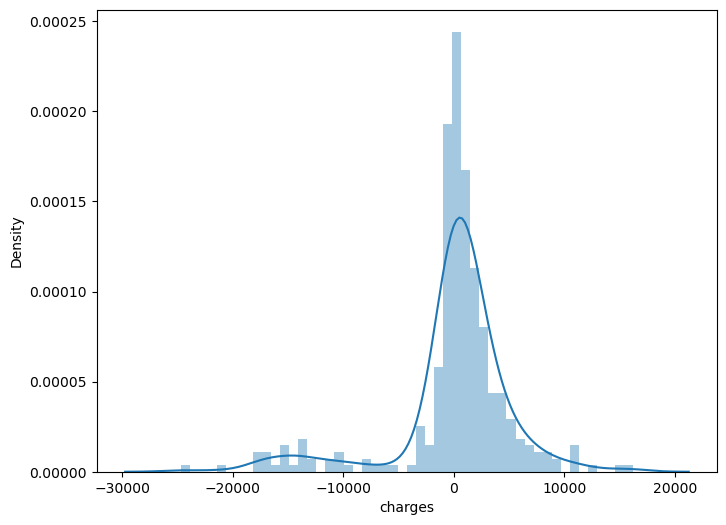

In [43]:
sns.distplot(xgb_y-y_test)

In [44]:
print('Coefficient o R^2 <-- on train data : {}'.format(xgb_regressor.score(X_train,y_train)))
print('Coefficient o R^2 <-- on test data : {}'.format(xgb_regressor.score(X_test,y_test)))
print("Mean absolute Error : ",mean_absolute_error(xgb_y,y_test))
print("Mean squared Error : ",mean_squared_error(xgb_y,y_test))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(xgb_y,y_test)))

Coefficient o R^2 <-- on train data : 0.9967645096713862
Coefficient o R^2 <-- on test data : 0.7989378936755648
Mean absolute Error :  3132.545207121458
Mean squared Error :  28607644.838372882
Root Mean Squared Error :  5348.611486953682


### Adaboost

In [45]:
adab_regressor = AdaBoostRegressor()
adab_regressor.fit(X_train,y_train)
adb_y = adab_regressor.predict(X_test)

C:\Users\clivinjohn.geju\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

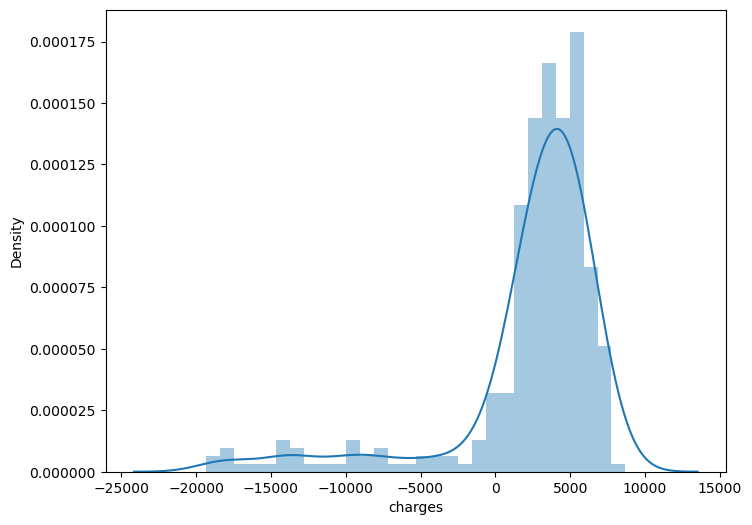

In [46]:
sns.distplot(adb_y-y_test)

In [47]:
print('Coefficient o R^2 <-- on train data : {}'.format(adab_regressor.score(X_train,y_train)))
print('Coefficient o R^2 <-- on test data : {}'.format(adab_regressor.score(X_test,y_test)))
print("Mean absolute Error : ",mean_absolute_error(adb_y,y_test))
print("Mean squared Error : ",mean_squared_error(adb_y,y_test))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(adb_y,y_test)))

Coefficient o R^2 <-- on train data : 0.8196443075976618
Coefficient o R^2 <-- on test data : 0.7771320417290204
Mean absolute Error :  4651.123988681339
Mean squared Error :  31710238.75469391
Root Mean Squared Error :  5631.184489491879


### Performance Metrics

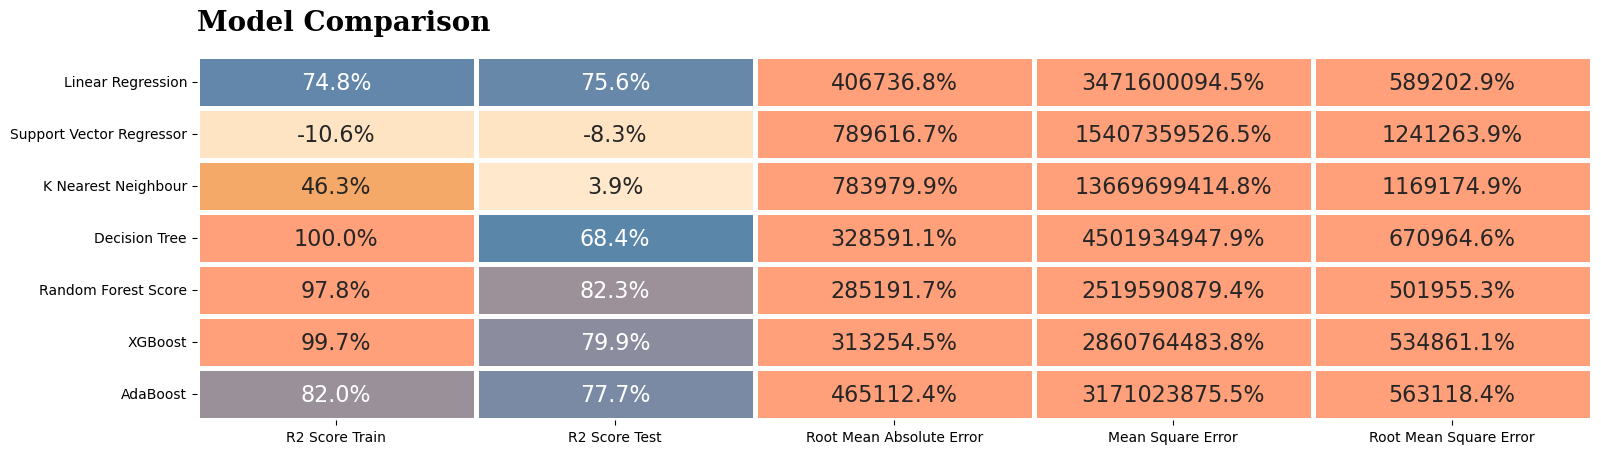

In [48]:
lr_df = pd.DataFrame(data=[lr_regressor.score(X_train,y_train),lr_regressor.score(X_test, y_test), mean_absolute_error(y_test, lr_y), mean_squared_error(y_test, lr_y), np.sqrt(mean_squared_error(y_test, lr_y))], 
             columns=['Linear Regression'], index=["R2 Score Train","R2 Score Test", "Root Mean Absolute Error", "Mean Square Error", "Root Mean Square Error"])
svr_df = pd.DataFrame(data=[svr_regressor.score(X_train,y_train),svr_regressor.score(X_test, y_test), mean_absolute_error(y_test, svr_y),mean_squared_error(y_test, svr_y), np.sqrt(mean_squared_error(y_test, svr_y))], 
             columns=['Support Vector Regressor'],index=["R2 Score Train","R2 Score Test", "Root Mean Absolute Error", "Mean Square Error", "Root Mean Square Error"])
knn_df = pd.DataFrame(data=[knn_regressor.score(X_train,y_train),knn_regressor.score(X_test, y_test), mean_absolute_error(y_test, knn_y), mean_squared_error(y_test, knn_y), np.sqrt(mean_squared_error(y_test, knn_y))], 
             columns=['K Nearest Neighbour'], index=["R2 Score Train","R2 Score Test", "Root Mean Absolute Error", "Mean Square Error", "Root Mean Square Error"])

dt_df = pd.DataFrame(data=[dt_regressor.score(X_train,y_train),dt_regressor.score(X_test, y_test), mean_absolute_error(y_test, dt_y), mean_squared_error(y_test, dt_y), np.sqrt(mean_squared_error(y_test, dt_y))], 
             columns=['Decision Tree'], index=["R2 Score Train","R2 Score Test", "Root Mean Absolute Error", "Mean Square Error", "Root Mean Square Error"])
rf_df = pd.DataFrame(data=[rf_regressor.score(X_train,y_train),rf_regressor.score(X_test, y_test), mean_absolute_error(y_test, rf_y), mean_squared_error(y_test, rf_y), np.sqrt(mean_squared_error(y_test,rf_y))], 
             columns=['Random Forest Score'], index=["R2 Score Train","R2 Score Test", "Root Mean Absolute Error", "Mean Square Error", "Root Mean Square Error"])
xgb_df = pd.DataFrame(data=[xgb_regressor.score(X_train,y_train),xgb_regressor.score(X_test, y_test), mean_absolute_error(y_test, xgb_y), mean_squared_error(y_test, xgb_y), np.sqrt(mean_squared_error(y_test,xgb_y))], 
             columns=['XGBoost'], index=["R2 Score Train","R2 Score Test", "Root Mean Absolute Error", "Mean Square Error", "Root Mean Square Error"])
adb_df = pd.DataFrame(data=[adab_regressor.score(X_train,y_train),adab_regressor.score(X_test, y_test), mean_absolute_error(y_test, adb_y), mean_squared_error(y_test, adb_y), np.sqrt(mean_squared_error(y_test,adb_y))], 
             columns=['AdaBoost'], index=["R2 Score Train","R2 Score Test", "Root Mean Absolute Error", "Mean Square Error", "Root Mean Square Error"])


df_models = round(pd.concat([lr_df,svr_df,knn_df,dt_df,rf_df,xgb_df,adb_df], axis=1),3)
colors = ["bisque","ivory","sandybrown","steelblue","lightsalmon"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "white"

fig = plt.figure(figsize=(18,26)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')
plt.show()